In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [32]:
data = pd.read_csv('tested.csv')
print(data.head())
print(data.info())



   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (

In [33]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])



In [34]:
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [35]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [36]:
x=data.drop("Survived",axis=1)
y=data['Survived']

In [37]:
X_train, X_test ,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
#train the model
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [39]:
#make the predictions
y_pred = model.predict(X_test)

In [40]:
#evaluate the model
print("Accuracy:",accuracy_score(y_test,y_pred))
print("classficiation Report:\n",classification_report(y_test,y_pred))

Accuracy: 1.0
classficiation Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



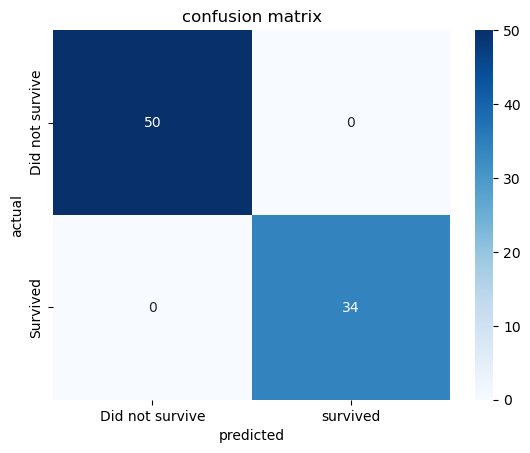

In [41]:
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True, fmt= 'd' ,cmap='Blues',xticklabels=['Did not survive','survived'], yticklabels=['Did not survive', 'Survived'])
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel("actual")
plt.show()


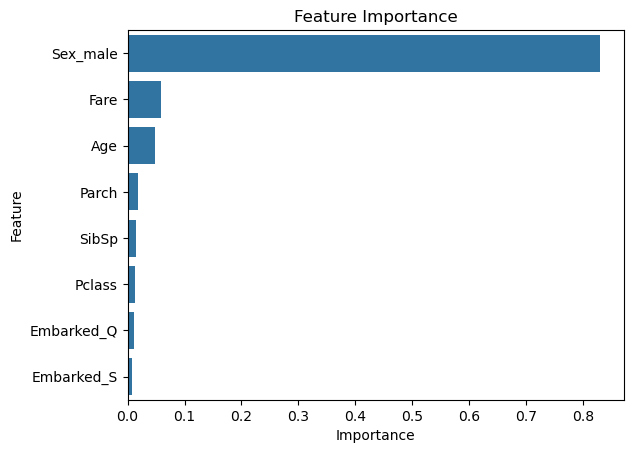

In [42]:
importances = pd.DataFrame({'Feature': x.columns, 'Importance':model.feature_importances_})
importances = importances.sort_values(by='Importance',ascending=False)
sns.barplot(x="Importance",y='Feature',data=importances)
plt.title('Feature Importance')
plt.show()

In [43]:
!pip install seaborn

In [44]:
import os
os.makedirs('species_image/', exist_ok=True)


In [70]:
# IRIS FLOWER CLASSIFICATION



import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.image as mpimg

image_directory = 'species_image'


species_to_image = {
    'Iris-setosa': 'species_image/IrisS.jpg',
    'Iris-versicolor': 'species_image/IrisV.jpg',
    'Iris-virginica': 'species_image/IrisVi.jpg'
}

df = pd.read_csv("Iris.csv")
print(df.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [72]:
df = df.rename(columns={'SepalLengthCm' : 'Sepallength','SepalWidthCm' : 'Sepalwidth','PetalLengthCm' : 'Petallength', 'PetalWidthCm': 'PetalWidth'})
print(df.head())

   Id  Sepallength  Sepalwidth  Petallength  PetalWidth      Species
0   1          5.1         3.5          1.4         0.2  Iris-setosa
1   2          4.9         3.0          1.4         0.2  Iris-setosa
2   3          4.7         3.2          1.3         0.2  Iris-setosa
3   4          4.6         3.1          1.5         0.2  Iris-setosa
4   5          5.0         3.6          1.4         0.2  Iris-setosa


In [74]:
# slicing
X = df.iloc[: ,1:-1].values
y = df.iloc[:,-1].values

label_encoder=LabelEncoder()
y = label_encoder.fit_transform(y)
# Train the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [76]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [78]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 100.00%

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [80]:
##### print("\nEnter the following features of the flowers")
sepal_length = float(input("Sepallength : "))
sepal_width = float(input("Sepalwidth : "))
petal_length = float(input("Petallength : "))
petal_width = float(input("Petalwidth : "))


Sepallength :  5.1
Sepalwidth :  3.5
Petallength :  1.4
Petalwidth :  0.2



Predicted Species: Iris-setosa


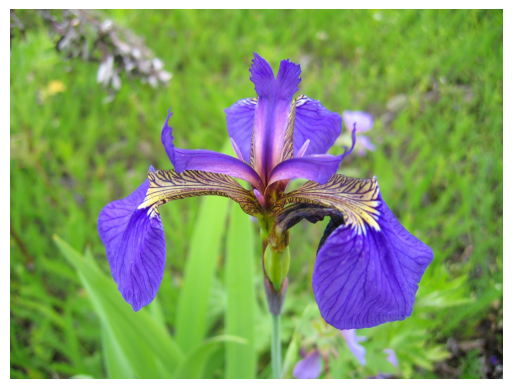

In [84]:
# user_input = [[sepal_length, sepal_width, petal_length, petal_width]]

# # Predict the species using the trained model
# predicted_class = model.predict(user_input)
# predicted_species = label_encoder.inverse_transform(predicted_class)

# print(f"\nPredicted Species: {predicted_species[0]}")

# image_path = image_directory + species_to_image.get(predicted_species[0], '')
# img = mpimg.imread(image_path)
# plt.imshow(img)
# plt.axis('off')  # Hide axes
# plt.show()




import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Example: User input for prediction
user_input = [[sepal_length, sepal_width, petal_length, petal_width]]

# Predict the species using the trained model
predicted_class = model.predict(user_input)
predicted_species = label_encoder.inverse_transform(predicted_class)

print(f"\nPredicted Species: {predicted_species[0]}")

# Construct the image path safely
image_path = os.path.join(species_to_image.get(predicted_species[0], ''))

# Check if the file exists
if os.path.exists(image_path):
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()
else:
    print(f"Error: File not found - {image_path}")

In [ ]:
# # Import necessary libraries
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.preprocessing import LabelEncoder

# # Step 1: Load the dataset from a CSV file
# file_path = "iris.csv"  # Ensure the file is in your project directory
# df = pd.read_csv(file_path)

# # Step 2: Prepare the data
# X = df.iloc[:, :-1].values  # Features (all columns except the last)
# y = df.iloc[:, -1].values   # Target (last column)

# # Encode target labels if they are categorical
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)

# # Step 3: Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 4: Train a machine learning model
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)

# # Step 5: Evaluate the model
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy * 100:.2f}%\n")
# print("Classification Report:")
# print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# # Step 6: Get input from the user for prediction
# print("\nEnter the following features for prediction:")
# sepal_length = float(input("Sepal Length (cm): "))
# sepal_width = float(input("Sepal Width (cm): "))
# petal_length = float(input("Petal Length (cm): "))
# petal_width = float(input("Petal Width (cm): "))

# # Prepare the input data for prediction (reshaped into a 2D array)
# user_input = [[sepal_length, sepal_width, petal_length, petal_width]]

# # Predict the species using the trained model
# predicted_class = model.predict(user_input)
# predicted_species = label_encoder.inverse_transform(predicted_class)

# print(f"\nPredicted Species: {predicted_species[0]}")


In [1]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Load MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# Filter for binary classification (digits 0 and 1)
filter_mask = (y == '0') | (y == '1')
X, y = X[filter_mask], y[filter_mask]

# Normalize the data
X = X / 255.0

# Convert labels to integers
y = y.astype(int)

# Reduce dataset size
sample_size = 10000
X, _, y, _ = train_test_split(X, y, train_size=sample_size, random_state=42, stratify=y)

# Reduce features using PCA
pca = PCA(n_components=100)
X = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train logistic regression model
model = LogisticRegression(max_iter=500, solver='saga', n_jobs=-1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9985
